In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt

# from sklearn.linear_model import Lasso, Ridge
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler

In [2]:
results_2019 = pd.read_csv("../data/bac-results-2019.csv", index_col=0)
results_2020 = pd.read_csv("../data/bac-results-2020.csv", index_col=0)
results_2021 = pd.read_csv("../data/bac-results-2021.csv", index_col=0)
results_2019.fillna('', inplace=True)
results_2020.fillna('', inplace=True)
results_2021.fillna('', inplace=True)
print()

C:\Users\vampi\AppData\Local\Temp\ipykernel_10480\1133434566.py:3: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  results_2021 = pd.read_csv("../data/bac-results-2021.csv", index_col=0)


In [3]:
pd.set_option('display.max_columns', None)
display(results_2021.head())
print(results_2021.columns)

,id,county_rank,country_rank,high_school,county,prev_promotion,school_type,specialization,romanian_competency,romanian_written,romanian_written_appeal,romanian_written_final,mother_tongue,mother_tongue_competency,mother_tongue_written,mother_tongue_written_appeal,mother_tongue_written_final,modern_language,modern_language_results,mandatory_subject,mandatory_subject_written,mandatory_subject_written_appeal,mandatory_subject_written_final,elective_subject,elective_subject_written,elective_subject_written_appeal,elective_subject_written_final,digital_competencies,final_grade,successful
0,AB1000328,1866,95288,"COLEGIUL TEHNIC ""APULUM"" ALBA IULIA",AB,DA,ZI,TEHNICIAN DESIGNER VESTIMENTAR,Utilizator nivel mediu,5.05,,5.05,,,,,,LIMBA ENGLEZA,A2-A2-A2-A2-A2,MATEMATICA TEHN,2.95,,2.95,BIOLOGIE VEGETALA SI ANIMALA,7.80,,7.80,Utilizator avansat,,RESPINS
1,AB1005434,1867,95289,"LICEUL TEOLOGIC ROMANO-CATOLIC ""GROF MAJLATH ...",AB,DA,ZI,TEOLOGIE ROMANO-CATOLICA,Utilizator nivel mediu,3.70,4.45,4.45,LIMBA MAGHIARA (REAL),Utilizator avansat,7.55,,7.55,LIMBA ENGLEZA,B1-B1-B1-B1-B1,ISTORIE,9.35,,9.35,FILOSOFIE,7.30,,7.30,Utilizator experimentat,,RESPINS
2,AB1007560,1728,87156,"LICEUL ""DR. LAZAR CHIRILA"" BAIA DE ARIES",AB,DA,ZI,MATEMATICA-INFORMATICA,Utilizator experimentat,6.05,,6.05,,,,,,LIMBA ENGLEZA,B2-B2-B2-B2-B2,MATEMATICA MATE-INFO,5.35,,5.35,"ANATOMIE SI FIZIOLOGIE UMANA, GENETICA SI ECO...",6.75,,6.75,Utilizator experimentat,6.05,REUSIT
3,AB1007648,1868,95290,"LICEUL ""DR. LAZAR CHIRILA"" BAIA DE ARIES",AB,DA,ZI,MATEMATICA-INFORMATICA,Utilizator experimentat,6.15,,6.15,,,,,,LIMBA ENGLEZA,B1-B1-B1-B1-B1,MATEMATICA MATE-INFO,3.80,3.2,3.20,"ANATOMIE SI FIZIOLOGIE UMANA, GENETICA SI ECO...",5.75,,5.75,Utilizator experimentat,,RESPINS
4,AB1008259,1767,89406,"LICEUL ""DR. LAZAR CHIRILA"" BAIA DE ARIES",AB,DA,ZI,MATEMATICA-INFORMATICA,Utilizator experimentat,5.50,,5.50,,,,,,LIMBA ENGLEZA,A2-A2-A2-A2-A2,MATEMATICA MATE-INFO,5.80,,5.80,FIZICA TEO,6.55,6.4,6.40,Utilizator experimentat,5.9,RESPINS


Index(['id', 'county_rank', 'country_rank', 'high_school', 'county',
       'prev_promotion', 'school_type', 'specialization',
       'romanian_competency', 'romanian_written', 'romanian_written_appeal',
       'romanian_written_final', 'mother_tongue', 'mother_tongue_competency',
       'mother_tongue_written', 'mother_tongue_written_appeal',
       'mother_tongue_written_final', 'modern_language',
       'modern_language_results', 'mandatory_subject',
       'mandatory_subject_written', 'mandatory_subject_written_appeal',
       'mandatory_subject_written_final', 'elective_subject',
       'elective_subject_written', 'elective_subject_written_appeal',
       'elective_subject_written_final', 'digital_competencies', 'final_grade',
       'successful'],
      dtype='object')


[0.79363081 0.02001105]


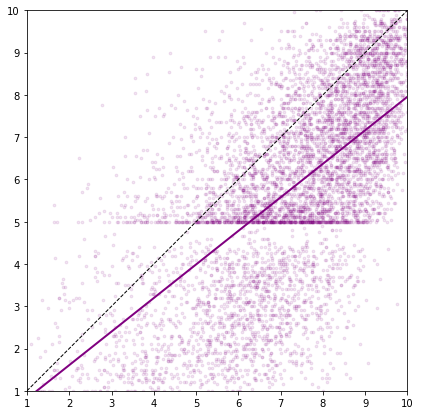

In [60]:
# Let's plot the minorities' Romanian grades and the average of their electory and mandatory subjects.
# Predict the Romanian grade from that average.

# Separate the minorities. Create column for average.
romanian_plus_results = results_2021[(results_2021['mother_tongue'] != '') & (results_2021['romanian_written_final'] >= 1)]
romanian_plus_results_valid = romanian_plus_results[(romanian_plus_results['mandatory_subject_written_final'] >= 1.0) & (romanian_plus_results['elective_subject_written_final'] >= 1.0)].copy()
romanian_plus_results_valid.loc[:, 'mandatory_elective_average'] = romanian_plus_results_valid[['mandatory_subject_written_final', 'elective_subject_written_final']].mean(axis=1)

dot_size_minority = 30
dot_size_ro = dot_size_minority * len(romanian_plus_results_valid)

x_minority = romanian_plus_results_valid['mandatory_elective_average']
y_minority = romanian_plus_results_valid['romanian_written_final']

linear_line_minority = np.polyfit(x_minority, y_minority, 1)
print(linear_line_minority)
end_points_x = [1, 10]
end_points_y = [linear_line_minority[0] * x + linear_line_minority[1] for x in end_points_x]

plt.figure(figsize=(7, 7))
plt.scatter(x_minority, y_minority, marker='.', alpha=0.1, color='purple', s=dot_size_minority)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(1, 10)
plt.ylim(1, 10)
plt.plot(end_points_x, end_points_y, linewidth = 2, color='purple')
plt.plot(end_points_x, end_points_x, '--', linewidth = 1, color='black')
plt.show()

1.590494056710273
[0.65135129 2.5625817 ]


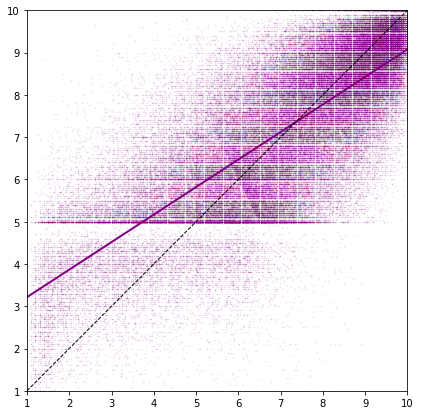

In [61]:
# Same for the Romanian students.

romanian_only_results = results_2021[(results_2021['mother_tongue'] == '') & (results_2021['romanian_written_final'] >= 1)]
romanian_only_results_valid = romanian_only_results[(romanian_only_results['mandatory_subject_written_final'] >= 1.0) & (romanian_only_results['elective_subject_written_final'] >= 1.0)].copy()
romanian_only_results_valid.loc[:, 'mandatory_elective_average'] = romanian_only_results_valid[['mandatory_subject_written_final', 'elective_subject_written_final']].mean(axis=1)

dot_size_ro /= len(romanian_only_results_valid)

x_ro = romanian_only_results_valid['mandatory_elective_average']
y_ro = romanian_only_results_valid['romanian_written_final']

linear_line_ro = np.polyfit(x_ro, y_ro, 1)
print(linear_line_ro)
end_points_x = [1, 10]
end_points_y = [linear_line_ro[0] * x + linear_line_ro[1] for x in end_points_x]

plt.figure(figsize=(7, 7))
plt.scatter(x_ro, y_ro, marker='.', alpha=0.1, color='purple', s=dot_size_ro)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(1, 10)
plt.ylim(1, 10)
plt.plot(end_points_x, end_points_y, linewidth = 2, color='purple')
plt.plot(end_points_x, end_points_x, '--', linewidth = 1, color='black')
plt.show()